## Transit Speeds

For assumed travel speeds for new transit service and upgraded transit service, what speeds should we use? What are speeds for existing routes?

The output of this short notebook is used to set the assumed speeds for transit projects.

In [24]:
import arcpy
import os
from arcgis.features import SpatialDataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
tr = pd.DataFrame.spatial.from_featureclass("TransitRoutes")

In [17]:
tr.head()

,OBJECTID,shape_id,trip_id,route_id,Length_Miles,TransitTime,RouteType,StopCount,SHAPE,mph
0,1,168744.0,3522196.0,74606.0,6.977684,36.772844,None,40.0,"{""paths"": [[[429319.6299999999, 4513829.51], [...",11.385061
1,2,168745.0,3522214.0,74607.0,6.671474,33.885705,None,34.0,"{""paths"": [[[424247.5800000001, 4508583.1], [4...",11.812899
2,3,168747.0,3522339.0,74608.0,4.470102,22.470184,None,22.0,"{""paths"": [[[423270.7999999998, 4512865.140000...",11.936089
3,4,168749.0,3522785.0,74609.0,10.438241,52.058845,None,50.0,"{""paths"": [[[423270.7999999998, 4512865.140000...",12.030511
4,5,168751.0,3523164.0,74610.0,9.905705,48.668182,None,45.0,"{""paths"": [[[424309.0099999998, 4501340.710000...",12.212132


In [5]:
tr['mph'] = tr['Length_Miles'] / (tr['TransitTime']/60)

In [18]:
tr.loc[tr['RouteType'].apply(lambda x: x is None), 'RouteType'] = 'Other'

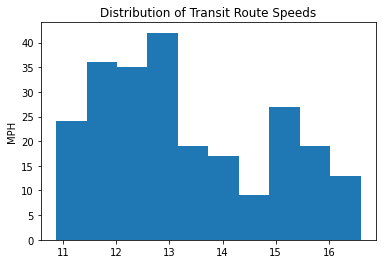

In [27]:
plt.hist(tr.loc[tr['RouteType']  == 'Other', 'mph'])
plt.title('Distribution of Transit Route Speeds')
plt.ylabel('MPH')
plt.savefig('transit_speeds.png')
plt.show()

In [19]:
tr.groupby('RouteType').agg(
    median_mph=pd.NamedAgg(column='mph', aggfunc=np.median))

,median_mph
RouteType,
CommuterRail,29.143941
Other,12.945353
